In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("Boston_housing.csv")
df.head()
#working on Simple Linear Regression

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,Unnamed: 14
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,NaN
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,NaN
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,NaN
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,NaN
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,NaN


In [3]:
#dropping
#unnamed
df.drop("Unnamed: 14",axis=1,inplace=True)

In [4]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [5]:
df.rename(columns={"MEDV":"Price"},inplace=True)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [6]:
#cehcking rows and columns
df.shape

(506, 14)

In [7]:
#checking null values
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

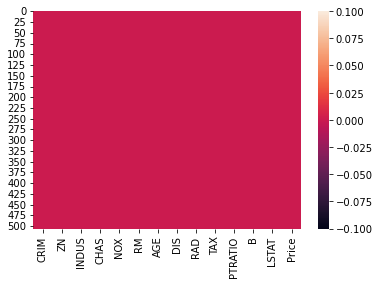

In [8]:
#visualisng
sns.heatmap(df.isnull())
plt.show()

In [9]:
#cehcking types
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
Price      float64
dtype: object

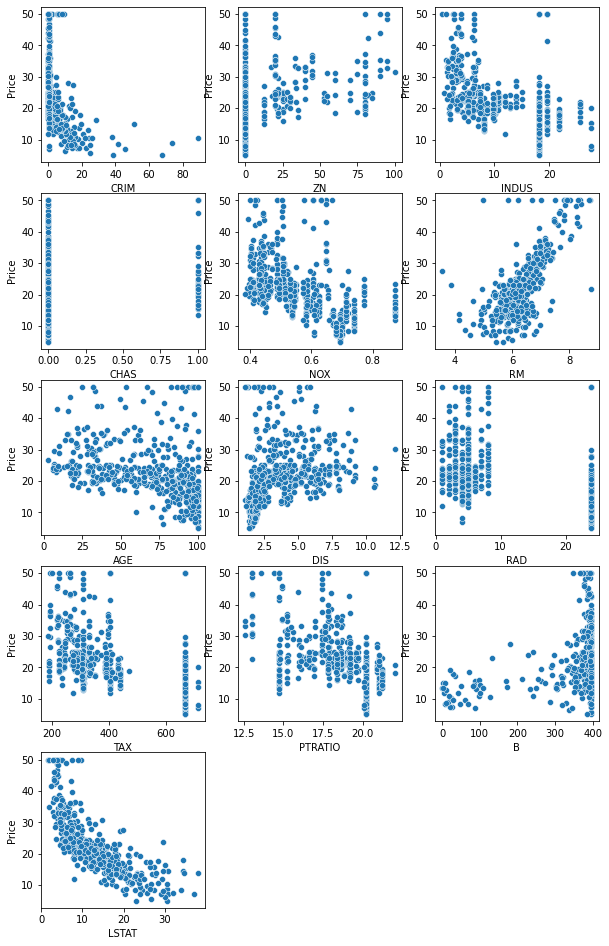

In [10]:
#Relationship between input and output we will plot sactterplot
plt.figure(figsize=(10,20))
x=["CRIM" ,"ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT"]
Y=df["Price"]
for i,col in enumerate(x):
    plt.subplot(6,3,i+1)
    sns.scatterplot(df[col],Y)
plt.show()

In [11]:
#here all the graphs points are scatterd


In [12]:
#checking correlation
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


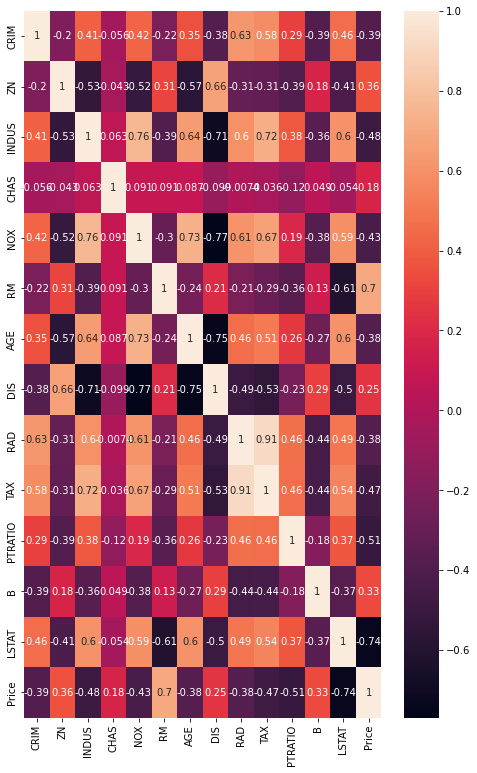

In [13]:
plt.figure(figsize=(8,13))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [14]:

#Crorrelation
#CRIM=.39 it is fine
#ZN=36
#INDUS=48
#CHAS=18
#Nox=43
#RM=.7
#AGE=.38
#DIS=.25
#RDA=.38
#TAX=47
#PTRATIO=51
#B=33
#LASTAT=74

In [15]:
X=df[["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT"]]
Y=df["Price"]

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [17]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [18]:
lr.fit(x_train,y_train)

LinearRegression()

In [19]:
y_pred=lr.predict(x_test)

In [20]:
lr.coef_


array([-9.85424717e-02,  6.07841138e-02,  5.91715401e-02,  2.43955988e+00,
       -2.14699650e+01,  2.79581385e+00,  3.57459778e-03, -1.51627218e+00,
        3.07541745e-01, -1.12800166e-02, -1.00546640e+00,  6.45018446e-03,
       -5.68834539e-01])

In [21]:
lr.intercept_

46.39649387182344

In [22]:
#mean sqaured error
from sklearn.metrics import mean_squared_error
e1=mean_squared_error(y_test,y_pred)
print("Mean sqaured error :",e1)

Mean sqaured error : 19.831323672063153


In [23]:
rsme=np.sqrt(e1)
rsme

4.45323743719815

In [24]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.783629538507629

In [25]:
#We got score .78 from r2 score.

# Assumption of Linear Regression

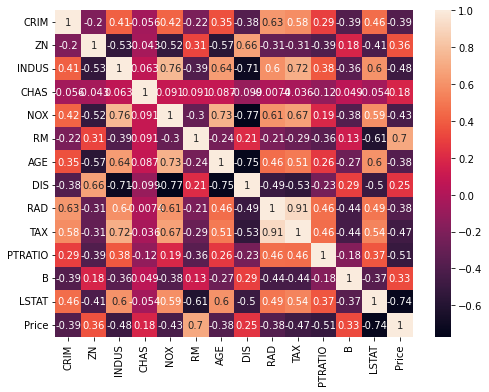

In [26]:
#Multicolinearity
#We will check the correlation
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [27]:
#here lASTAT and RM have no correlation with any other inputs
#rest of all the inputs are correalted with each othher
X=df[["LSTAT","RM"]] #dependent variabels
Y=df["Price"]#independent variables

In [28]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [29]:
x_train

,LSTAT,RM
13,8.26,5.949
61,14.44,5.966
377,21.24,6.794
39,4.32,6.595
365,7.12,3.561
...,...,...
255,9.25,5.876
72,5.52,6.065
396,19.37,6.405
235,10.88,6.086


In [30]:
y_train

13     20.4
61     16.0
377    13.3
39     30.8
365    27.5
       ... 
255    20.9
72     22.8
396    12.5
235    24.0
37     21.0
Name: Price, Length: 354, dtype: float64

In [31]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [32]:
lr.coef_

array([-0.67762654,  4.12674118])

In [33]:
lr.intercept_

5.31681847109601

In [34]:
y_test=lr.predict(x_test)

In [35]:
mean_squared_error(y_test,y_pred)

9.486828080536025

In [36]:
r2_score(y_test,y_pred)

0.7970343262437203

In [37]:
#multicolinearity is solved
#score is 79% is good

In [38]:
##Work on 1st and 2nd Assumption of Linear Regression 
#1. there should be a linear relationship
#2. if occur linear relation then next check relation is homoskedatik 
#not a heteroskedastik

In [39]:
residual=y_test-y_pred
residual

array([-3.9131237 ,  0.1401061 , -0.37593877,  2.4156143 ,  1.60299413,
        4.05724823, -3.14188182,  3.6763411 , -7.00012908, -0.94524142,
        0.66611182,  1.92774889, -1.41635538, -4.89161195, -1.10158856,
       -0.78896694, -0.11071771,  0.66066504, -4.98761181, -2.82621102,
        0.22751141,  0.99231147,  1.07845048,  2.83588555, -3.56942532,
        2.13087958,  3.1493933 ,  6.45266151, -4.43665333, -1.26445255,
        7.68992795,  2.03520337, -6.49371991,  2.16954426,  2.82372083,
        0.11216381,  2.04854836,  4.38553922, -3.50959211,  0.43512265,
        2.27936669,  5.78054999, -1.90919975, -1.91715661, -0.75129026,
        3.61322046, -3.31409775,  0.34639969, -2.53881295,  4.13121701,
        1.13523068, -0.4504125 ,  3.44230232, -3.10683813,  1.28313907,
        3.39849645, -1.50907551, -0.45642645,  3.46013691,  1.3568983 ,
        2.10290644,  0.87643259, -1.00477776,  0.46257221, -3.44077583,
       -1.32821843,  1.88924569,  4.90875757, -1.89725602, -3.91

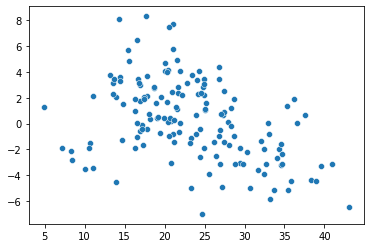

In [40]:
#visualise
sns.scatterplot(y_pred,residual)
plt.show()

In [41]:
#here we cannot see liner regression line


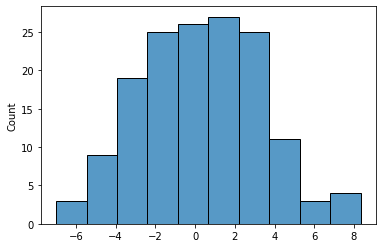

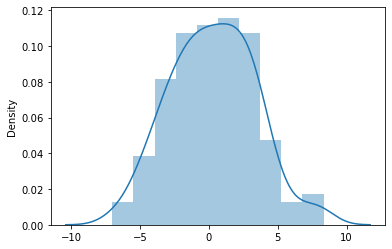

In [42]:
#poltting distplot and histplot 
#cehcking graph
sns.histplot(residual)
plt.show()
sns.distplot(residual)
plt.show()


In [43]:
#working on polynomial linear regression
def poly_1(X):
    m=4
    c=5
    Y=m*X+c
    return Y

In [44]:
X=np.arange(-100,100)  #start =-100 stop=99 step=+1
 
Y=poly_1(X)
#print(Y)
#create dictionary
dic={'Ínput_X':X,'Output_Y':Y}
P=pd.DataFrame(dic)
print(P)

     Ínput_X  Output_Y
0       -100      -395
1        -99      -391
2        -98      -387
3        -97      -383
4        -96      -379
..       ...       ...
195       95       385
196       96       389
197       97       393
198       98       397
199       99       401

[200 rows x 2 columns]


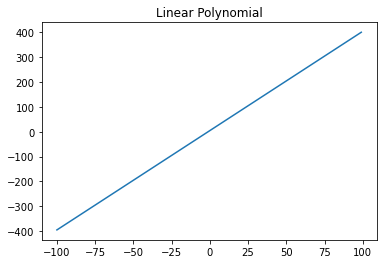

In [45]:
plt.plot(X,Y)
plt.title("Linear Polynomial")
plt.show()

In [46]:
def poly_2(X):
    m1=6
    m2=4
    c=5
    Y=m1*(X**2)+m2*X+c
    return Y

In [47]:
X=np.arange(-100,100)
Y=poly_2(X)
dic={"X input":X,"Y output":Y}
f=pd.DataFrame(dic)
print(f)

     X input  Y output
0       -100     59605
1        -99     58415
2        -98     57237
3        -97     56071
4        -96     54917
..       ...       ...
195       95     54535
196       96     55685
197       97     56847
198       98     58021
199       99     59207

[200 rows x 2 columns]


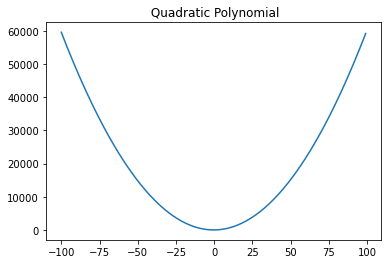

In [48]:
plt.plot(X,Y)
plt.title(" Quadratic Polynomial")
plt.show()

In [49]:
def poly_3(X):
    m1=8
    m2=6
    m3=4
    c=5
    Y=m1*(X**3)+m2*(X**2)+m3*X+c
    return Y

In [50]:
X=np.arange(-100,100)
Y=poly_3(X)
dic={"X input":X,"Y output":Y}
f=pd.DataFrame(dic)
print(f)

     X input  Y output
0       -100  -7940395
1        -99  -7703977
2        -98  -7472299
3        -97  -7245313
4        -96  -7022971
..       ...       ...
195       95   6913535
196       96   7133573
197       97   7358231
198       98   7587557
199       99   7821599

[200 rows x 2 columns]


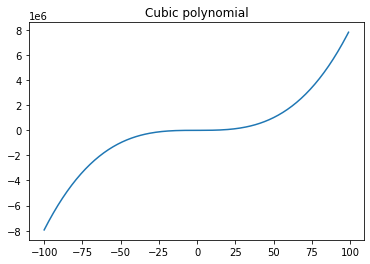

In [51]:
plt.plot(X,Y)
plt.title("Cubic polynomial")
plt.show()

In [53]:
#select input and outpt
X=df[["LSTAT","RM"]] #2d
Y=df["Price"] #1D output

In [54]:
#Polynomial featuring
from sklearn.preprocessing import PolynomialFeatures
#taking degree as 3
pf=PolynomialFeatures(3)


In [55]:
x_poly=pf.fit_transform(X)
x_poly

array([[  1.        ,   4.98      ,   6.575     , ..., 163.06263   ,
        215.2885125 , 284.24135938],
       [  1.        ,   9.14      ,   6.421     , ..., 536.4077716 ,
        376.83526274, 264.73295646],
       [  1.        ,   4.03      ,   7.185     , ..., 116.6908665 ,
        208.04562675, 370.92005662],
       ...,
       [  1.        ,   5.64      ,   6.976     , ..., 221.9037696 ,
        274.46820864, 339.48408218],
       [  1.        ,   6.48      ,   6.794     , ..., 285.2827776 ,
        299.10666528, 313.60041418],
       [  1.        ,   7.88      ,   6.03      , ..., 374.429232  ,
        286.523892  , 219.256227  ]])

In [56]:
x_train,x_test,y_train,y_test=train_test_split(x_poly,Y,test_size=0.3,random_state=1)

In [57]:
lr=LinearRegression()

In [58]:
lr.fit(x_train,y_train)

LinearRegression()

In [59]:
y_pred=lr.predict(x_test)

In [60]:
lr.coef_

array([ 0.00000000e+00, -1.32016627e+01, -1.35853334e+02,  1.45872261e-01,
        3.84240479e+00,  1.92809723e+01, -7.88995366e-04, -1.63578788e-02,
       -3.14463621e-01, -8.36127733e-01])

In [61]:
lr.intercept_

333.86666488646364

In [62]:
mean_squared_error(y_test,y_pred)

17.390962024380514

In [65]:
r2_score(y_test,y_pred)

0.8102552032715606

In [66]:
#score is good .81

In [67]:
residual=y_test-y_pred


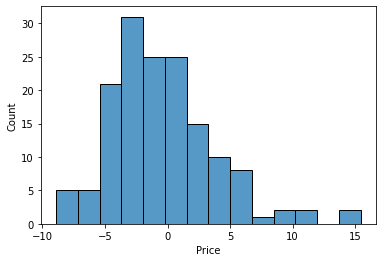

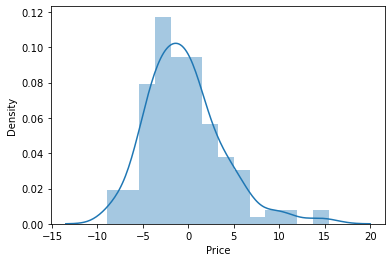

In [70]:
sns.histplot(residual)
plt.show()
sns.distplot(residual)
plt.show()


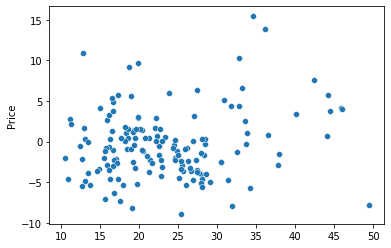

In [71]:
#Visualisng residual
sns.scatterplot(y_pred,residual)
plt.show()

In [72]:
#here points are scatter 
#and we can see linerRegression 
#if we take degree 3
#but datpoints are scattered means heteroskadastic but should be homoskedastik
#means datapoints are close each other

In [ ]:
#according the model & Score
#here LSTAT,RM are best for investment/sale.